In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]


In [0]:
# !dw configure


In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = dw.load_dataset('datafiniti/womens-shoe-prices')

In [4]:
data.dataframes

LazyLoadedDict({'7003_1': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes_jun19': LazyLoadedValue(<pandas.DataFrame>)})

In [5]:
df = data.dataframes['7003_1']
df.shape

(19045, 47)

In [6]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,websiteids,weight
17242,AVpfUAtqLJeJML4362io,NaN,VANS,"Shoes,Clothing,Women's Shoes,All Women's Shoes",NaN,NaN,2016-10-28 01:41:50,2016-10-28 01:41:50,"[{""dateSeen"":[""2016-10-28T01:41:50Z""],""sourceU...",NaN,NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/c8f4b254-4170...,NaN,"888654648980,vans/vn000vo2erh",VANS,VN000VO2ERH,"[{""dateSeen"":[""2016-10-28T01:41:50Z""],""name"":""...",Vans Winston Low Round Toe Canvas Sneakers,23.99,23.99,NaN,NaN,new,NaN,USD,2016-10-28T01:41:50Z,2016-10-26T00:00:00Z,NaT,TRUE,ApparelSave - Walmart.com,REDUCED USD 26.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Vans-Winston-Low-Wo...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Vans-Winston-Low-Wo...,8.88655E+11,NaN,NaN
17509,AVpfW1F3ilAPnD_xaTSt,NaN,Mia,"Shoes,Women's Shoes,Clothing,All Women's Shoes",White,NaN,2016-11-16 12:56:28,2016-11-16 12:56:28,"[{""dateSeen"":[""2016-11-16T12:56:28Z""],""sourceU...",NaN,8.876960e+11,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",NaN,https://i5.walmartimages.com/asr/917c4bb0-6a0d...,NaN,"mia/nw1482anat,887696153025,0887696153025",MIA,NW1482A-NAT,"[{""dateSeen"":[""2016-11-16T12:56:28Z""],""name"":""...",Mia Lysa Women Peep-toe Suede Ankle Boot,27.98,27.98,NaN,NaN,NaN,NaN,USD,2016-11-16T12:56:28Z,2016-11-09T00:00:00Z,NaT,TRUE,NaN,CLEARANCE USD 51.02,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Mia-Lysa-Women-US-7...,NaN,NaN,NaN,"7,7.5",NaN,https://www.walmart.com/ip/Mia-Lysa-Women-US-7...,8.87696E+11,NaN,NaN
13791,AVpfNZAtilAPnD_xXQMV,NaN,VANS,"Women's Athletic Shoes,Shoes,Women's Shoes,Clo...",NaN,NaN,2016-11-11 09:55:10,2016-11-11 09:55:10,"[{""dateSeen"":[""2016-11-11T09:55:10Z""],""sourceU...",NaN,8.859290e+11,"[{""key"":""Pattern"",""value"":[""blackgrey""]},{""key...",NaN,https://i5.walmartimages.com/asr/1509041a-ab0f...,NaN,"vans/vn0kwll5c,885929151817,0885929151817",NaN,VN-0KWLL5C,"[{""dateSeen"":[""2016-11-11T09:55:10Z""],""name"":""...",Vans Womens Corrie Hi Box Plaid Skate Sneakers,65,65,NaN,NaN,new,NaN,USD,2016-11-11T09:55:10Z,2016-11-09T00:00:00Z,NaT,FALSE,Tags Weekly - Walmart.com,CLEARANCE USD 30.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Vans-Womens-Corrie-...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Vans-Womens-Corrie-...,8.85929E+11,NaN,NaN
36,AVpfFTVk1cnluZ0-diFm,NaN,Nine West,"Shoes,Clothing,Women's Shoes,All Women's Shoes",Red,NaN,2016-11-04 03:10:50,2016-11-04 03:10:50,"[{""dateSeen"":[""2016-11-04T03:10:50Z""],""sourceU...",NaN,6.049930e+11,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",NaN,https://i5.walmartimages.com/asr/11952250-a629...,NaN,"ninewest/60368679530,604992740441,0604992740441",Nine West,60368679-530,"[{""dateSeen"":[""2016-11-04T03:10:50Z""],""name"":""...",Nine West Breeze Women Open Toe Canvas Wedge...,89,89,NaN,NaN,new,NaN,USD,2016-11-04T03:10:50Z,2016-11-03T00:00:00Z,NaT,FALSE,ApparelSave - Walmart.com,CLEARANCE USD 80.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Nine-West-Breeze-Wo...,NaN,NaN,NaN,"10.5,10,8.5,7,6,5,9.5,6.5,7.5,9,8",NaN,https://www.walmart.com/ip/Nine-West-Breeze-Wo...,6.04993E+11,NaN,NaN
8166,AVpfGwryLJeJML432f84,NaN,Cherokee Footwear,"Women's Clothing,Women's Scrubs,Women's Workwe...",NaN,NaN,2016-01-02 02:27:35,2016-04-05 22:23:56,NaN,NaN,NaN,NaN,NaN,http://www.nwscrubs.com/images/productimages/s...,NaN,cherokeefootwearcherokeecharacterprintslgmockw...,NaN,6749SBUNLG,NaN,Cherokee Footwear Cherokee Character Prints Lg...,25.95,25.95,NaN,NaN,NaN,NaN,U

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [8]:
df.prices_currency.unique()

array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

In [9]:
df.prices_currency.value_counts(normalize=True)

USD                               0.956031
CAD                               0.033515
AUD                               0.006199
EUR                               0.003362
GBP                               0.000788
new                               0.000053
Off Price Direct - Walmart.com    0.000053
Name: prices_currency, dtype: float64

In [0]:
df_usd = df[ df.prices_currency == 'USD'].copy()

In [11]:
df_usd.shape

(18199, 47)

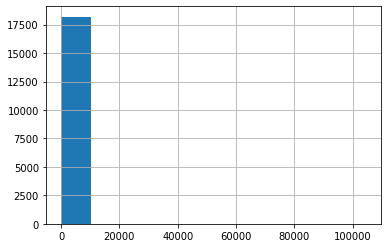

In [12]:
df_usd['prices_amountmin'] =  df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [13]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

1100.0

In [0]:
df_usd_filtered = df_usd [df_usd['prices_amountmin'] < filter_max]

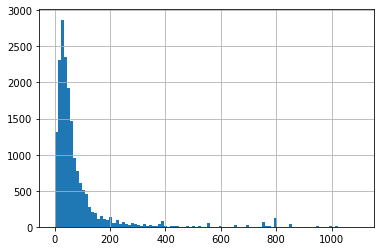

In [15]:
df_usd_filtered.prices_amountmin.hist(bins=100)

In [0]:
PATH = 'drive/My Drive/Colab Notebooks/dw_matrix'

In [19]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [17]:
df.to_csv(PATH + 'data/w_shoe_prices.csv', index=False)

FileNotFoundError: ignored

In [0]:
!git add matrix_one/day3.ipynb

In [0]:
!git commit -m 'Mayby now without keys?'

[master e12ee8b] Mayby now without keys?
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite matrix_one/day3.ipynb (98%)


In [0]:
!git config --global user.email "mszzukowski@gmail.com"
!git config --global user.name "Mateusz Żukowski"

In [0]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 1.04 KiB | 265.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/mszzukowski/dw_matrix.git
   a9b03b3..e12ee8b  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
